In [ ]:
import numpy as np
import pandas as pd
from qiskit.algorithms.optimizers import SPSA, COBYLA, SLSQP, L_BFGS_B
import pylab
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.font_manager as fm
%config InlineBackend.figure_format = 'svg'

In [ ]:
# Fig 3 Errors of eval estimate for HexTruss

Case = "HexTruss_consistent"
qubits = np.arange(6, 14)
modes = ['Optimizers', 'Patterns', 'Layers']
Optimizers = ['SPSA', 'COBYLA', 'SLSQP','L_BFGS_B']
Patterns = ['CZ', 'CX', 'CRX']
Depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in range(len(modes)):

    mode = modes[i]

    if i == 0:
        y_range = len(Optimizers)+1
        array_y = []; y_prep = []; y1 = np.zeros([len(qubits)], dtype=float)
        array_yerr = []; yerr_prep = []; yerr1_prep = []; yerr1 = np.zeros([len(qubits)*(y_range-1)], dtype=float)
        array_min = []

        for k in range(len(qubits)):
            qubit = qubits[k]

            excel_error_names = f'VQE_Convergence_{Case}_{qubit}Q_{mode}_data_error.xlsx'
            path_to_errors = r'C:\\temp\\' + \
                str(excel_error_names)
            file = pd.read_excel(path_to_errors)

            array_y = np.array([file['A'][0]])
            # print(array_y)
            y_prep.append(array_y)
            # print(y_prep)

            for j in range(1, y_range):
                array_yerr = np.array([file['A'][j]])
                yerr_prep.append(array_yerr)
            # print(yerr_prep)

        yerr1 = np.array(yerr_prep)
        # print(yerr)
        yerr1_prep = yerr_prep

    if i == 1:
        y_range = len(Patterns)+1
        array_y = []; y_prep = []; y2 = np.zeros([len(qubits)], dtype=float)
        array_yerr = []; yerr_prep = []; yerr2_prep = []; yerr2 = np.zeros([len(qubits)*(y_range-1)], dtype=float)
        array_min = []

        for k in range(len(qubits)):
            qubit = qubits[k]

            excel_error_names = f'VQE_Convergence_{Case}_{qubit}Q_{mode}_data_error.xlsx' # Depth=3 for CZ
            path_to_errors = r'C:\\temp\\' + str(excel_error_names)
            file = pd.read_excel(path_to_errors)

            array_y = np.array([file['A'][0]])
            # print(array_y)
            y_prep.append(array_y)
            # print(y_prep)

            for j in range(1, y_range):
                array_yerr = np.array([file['A'][j]])
                yerr_prep.append(array_yerr)
            # print(yerr_prep)

        yerr2 = np.array(yerr_prep)
        # print(yerr2)
        yerr2_prep = yerr_prep

    if i == 2:
        y_range = len(Depths)+1
        array_y = []; y_prep = []; y3 = np.zeros([len(qubits)], dtype=float)
        array_yerr = []; yerr_prep = []; yerr3_prep = []; yerr3 = np.zeros([len(qubits)*(y_range-1)], dtype=float)
        array_min = []

        for k in range(len(qubits)):
            qubit = qubits[k]
            
            excel_error_names = f'VQE_Convergence_{Case}_{qubit}Q_[1-10]{mode}_data_All_error.xlsx'
            path_to_errors = r'C:\\temp\\' + str(excel_error_names)
            file = pd.read_excel(path_to_errors)

            array_y = np.array([file['A'][0]])
            # print(array_y)
            y_prep.append(array_y)
            # print(y_prep)

            for j in range(1, y_range):
                array_yerr = np.array([file['A'][j]])
                yerr_prep.append(array_yerr)
            # print(yerr_prep)

        yerr3 = np.array(yerr_prep)
        # print(yerr3)
        yerr3_prep = yerr_prep


In [ ]:
# Continue Fig 3

def subfig_setting():
    pylab.xlim([5, 14])
    pylab.ylim([0, 0.1])
    textsize = 20
    ticks_textsize = 18
    csfont = {'fontname': 'Times New Roman'}
    pylab.ylabel('Error (%)', **csfont, size=textsize)
    ticks_font = fm.FontProperties(
        family='Times New Roman', style='normal', size=ticks_textsize, weight='normal', stretch='normal')
    for label in pylab.gca().get_xticklabels():
        label.set_fontproperties(ticks_font)
    for label in pylab.gca().get_yticklabels():
        label.set_fontproperties(ticks_font)
    pylab.gca().xaxis.set_ticklabels([])

def subfig_setting_end():
    pylab.xlim([5, 14])
    textsize = 20
    ticks_textsize = 18
    csfont = {'fontname': 'Times New Roman'}
    pylab.xlabel('Degrees of Freedom ($2^N$, $N$ is the number of qubits)', **csfont, size=textsize)
    pylab.ylabel('Error (%)', **csfont, size=textsize)
    ticks_font = fm.FontProperties(
        family='Times New Roman', style='normal', size=ticks_textsize, weight='normal', stretch='normal')
    for label in pylab.gca().get_xticklabels():
        label.set_fontproperties(ticks_font)
    for label in pylab.gca().get_yticklabels():
        label.set_fontproperties(ticks_font)


############################################################################################################
textsize = 20
legend_textsize = 16
csfont = {'fontname': 'Times New Roman'}
props = {'size': legend_textsize-2, 'family': 'Times New Roman',
         'weight': 'normal', 'style': 'normal'}
ticks_textsize = 18
ticks_font = fm.FontProperties(
    family='Times New Roman', style='normal', size=ticks_textsize, weight='normal', stretch='normal')
markersize = 12
markeredgewidth = 4
colors_map = matplotlib.colormaps['tab20c'].colors
colors = ['tomato', 'gold', 'mediumpurple', 'mediumseagreen']

fig = plt.figure(figsize=(8, 10))  # Adjust the overall figure size
gs = gridspec.GridSpec(3, 1)  # 3 rows, 1 column

# fig 3-1
ax1 = fig.add_subplot(gs[0, 0])

for t in range(len(Optimizers)):
    index = np.arange(t, len(yerr1), len(Optimizers))
    yerr1_array = yerr1[index]
    plt.plot(qubits, yerr1_array, marker='o',
             color=colors[t], markersize=markersize, linestyle='dashed')
    
subfig_setting()
pylab.legend([f'{Optimizers[0]}', f'{Optimizers[1]}',
              f'{Optimizers[2]}', f'{Optimizers[3]}'], loc='best', prop=props)
pylab.ylim([-2, 30])

colors = ['tomato', 'gold', 'mediumseagreen', 'mediumpurple']

# fig 3-2
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)  # sharex to align the x-axes

for t in range(len(Patterns)):
    index = np.arange(t, len(yerr2), len(Patterns))
    yerr2_array = yerr2[index]
    plt.plot(qubits, yerr2_array, marker='^', color=colors[t], markersize=markersize, linestyle='dashed')

subfig_setting()
pylab.legend([f'{Patterns[0]}', f'{Patterns[1]}', f'{Patterns[2]}'], loc='best', prop=props)
pylab.ylim([0, 8])


# fig 3-3
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)  # sharex to align the x-axes

for t in range(len(Depths)):
    index = np.arange(t, len(yerr3), len(Depths))
    yerr3_array = yerr3[index]
    plt.plot(qubits, yerr3_array, marker='v', color=colors_map[20-(2*t+1)], markersize=markersize, linestyle='dashed')

subfig_setting_end()
pylab.legend([f'Depth: {Depths[0]}', f'Depth: {Depths[1]}', f'Depth: {Depths[2]}',
              f'Depth: {Depths[3]}', f'Depth: {Depths[4]}', f'Depth: {Depths[5]}', f'Depth: {Depths[6]}',
              f'Depth: {Depths[7]}', f'Depth: {Depths[8]}', f'Depth: {Depths[9]}'],
             loc='upper left', ncol=3, prop=props)
pylab.ylim([-1, 35])


plt.tight_layout()
pylab.show()

fig_name = fig.get_label() + f'fig3_{Case}'
save_name = fig_name
path_save_fig = r'C:\\temp\\' + \
    str(save_name) + '.jpg'
fig.savefig(path_save_fig, dpi=1200)


In [ ]:
# Fig 4 Erros of eval estimate for Timoshenko Beam

Case = 'TEBeam_lumped'
qubits = np.array([3, 5, 7, 9, 11, 13])
modes = ['Optimizers', 'Patterns', 'Layers']
Optimizers = ['SPSA', 'COBYLA', 'SLSQP', 'L_BFGS_B']
Patterns = ['CZ', 'CX', 'CRX']
Depths = [1, 2, 3, 4, 5]

# pylab.rcParams['figure.figsize'] = (8, 8)

for i in range(len(modes)):

    mode = modes[i]

    if i == 0:
        y_range = len(Optimizers)+1
        array_y = []
        y_prep = []
        y1 = np.zeros([len(qubits)], dtype=float)
        array_yerr = []
        yerr_prep = []
        yerr1_prep = []
        yerr1 = np.zeros([len(qubits)*(y_range-1)], dtype=float)
        array_min = []
        
        for k in range(len(qubits)):
            qubit = qubits[k]

            excel_error_names = f'VQE_Convergence_{Case}_{qubit}Q_[CX]{mode}_data_error.xlsx'
            path_to_errors = r'C:\\temp\\' + \
                str(excel_error_names)
            file = pd.read_excel(path_to_errors)

            array_y = np.array([file['A'][0]])
            # print(array_y)
            y_prep.append(array_y)
            # print(y_prep)

            for j in range(1, y_range):
                array_yerr = np.array([file['A'][j]])
                yerr_prep.append(array_yerr)
            # print(yerr_prep)

        yerr1 = np.array(yerr_prep)
        # print(yerr)
        yerr1_prep = yerr_prep

    if i == 1:
        y_range = len(Patterns)+1
        array_y = []
        y_prep = []
        y2 = np.zeros([len(qubits)], dtype=float)
        array_yerr = []
        yerr_prep = []
        yerr2_prep = []
        yerr2 = np.zeros([len(qubits)*(y_range-1)], dtype=float)
        array_min = []

        for k in range(len(qubits)):
            qubit = qubits[k]

            # Depth=3 for CZ
            excel_error_names = f'VQE_Convergence_{Case}_{qubit}Q_{mode}_data_error.xlsx'
            path_to_errors = r'C:\\temp\\' + \
                str(excel_error_names)
            file = pd.read_excel(path_to_errors)

            array_y = np.array([file['A'][0]])
            # print(array_y)
            y_prep.append(array_y)
            # print(y_prep)

            for j in range(1, y_range):
                array_yerr = np.array([file['A'][j]])
                yerr_prep.append(array_yerr)
            # print(yerr_prep)

        yerr2 = np.array(yerr_prep)
        # print(yerr2)
        yerr2_prep = yerr_prep

    if i == 2:
        y_range = len(Depths)+1
        array_y = []
        y_prep = []
        y3 = np.zeros([len(qubits)], dtype=float)
        array_yerr = []
        yerr_prep = []
        yerr3_prep = []
        yerr3 = np.zeros([len(qubits)*(y_range-1)], dtype=float)
        array_min = []

        for k in range(len(qubits)):
            qubit = qubits[k]

            excel_error_names = f'VQE_Convergence_{Case}_{qubit}Q_{Depths}{mode}[CZ]_data_error.xlsx'
            path_to_errors = r'C:\\temp\\' + \
                str(excel_error_names)
            file = pd.read_excel(path_to_errors)

            array_y = np.array([file['A'][0]])
            # print(array_y)
            y_prep.append(array_y)
            # print(y_prep)

            for j in range(1, y_range):
                array_yerr = np.array([file['A'][j]])
                yerr_prep.append(array_yerr)
            # print(yerr_prep)

        yerr3 = np.array(yerr_prep)
        # print(yerr3)
        yerr3_prep = yerr_prep


In [ ]:
# Continue Fig 4

def subfig_setting():
    pylab.xlim([2, 14])
    textsize = 20
    ticks_textsize = 18
    csfont = {'fontname': 'Times New Roman'}
    pylab.ylabel('Error (%)', **csfont, size=textsize)
    ticks_font = fm.FontProperties(
        family='Times New Roman', style='normal', size=ticks_textsize, weight='normal', stretch='normal')
    for label in pylab.gca().get_xticklabels():
        label.set_fontproperties(ticks_font)
    for label in pylab.gca().get_yticklabels():
        label.set_fontproperties(ticks_font)
    pylab.gca().xaxis.set_ticklabels([])

def subfig_setting_end():
    pylab.xlim([2, 14])
    textsize = 20
    ticks_textsize = 18
    csfont = {'fontname': 'Times New Roman'}
    pylab.xlabel('Degrees of Freedom ($2^N$, $N$ is the number of qubits)', **csfont, size=textsize)
    pylab.ylabel('Error (%)', **csfont, size=textsize)
    ticks_font = fm.FontProperties(
        family='Times New Roman', style='normal', size=ticks_textsize, weight='normal', stretch='normal')
    for label in pylab.gca().get_xticklabels():
        label.set_fontproperties(ticks_font)
    for label in pylab.gca().get_yticklabels():
        label.set_fontproperties(ticks_font)

############################################################################################################
textsize = 20
legend_textsize = 16
csfont = {'fontname': 'Times New Roman'}
props = {'size': legend_textsize-2, 'family': 'Times New Roman',
         'weight': 'normal', 'style': 'normal'}
ticks_textsize = 18
ticks_font = fm.FontProperties(
    family='Times New Roman', style='normal', size=ticks_textsize, weight='normal', stretch='normal')
markersize = 12
markeredgewidth = 4
colors_map = matplotlib.colormaps['tab20c'].colors
colors = ['tomato', 'gold', 'mediumseagreen', 'mediumpurple']

# pattern = 'CX'
pattern = 'CZ'

fig = plt.figure(figsize=(8, 10))  # Adjust the overall figure size
gs = gridspec.GridSpec(3, 1)  # 3 rows, 1 column


# fig 4-1
ax1 = fig.add_subplot(gs[0, 0])

for t in range(len(Optimizers)):
    if t != 2:
        index = np.arange(t, len(yerr1), len(Optimizers))
        yerr1_array = yerr1[index]
        if t == 0:
            ax1.plot(qubits, yerr1_array, marker='o',
                     color=colors[0], markersize=markersize, linestyle='dashed')
        if t == 1:
            ax1.plot(qubits, yerr1_array, marker='o',
                     color=colors[1], markersize=markersize, linestyle='dashed')
        if t == 3:
            ax1.plot(qubits, yerr1_array, marker='o',
                     color=colors[2], markersize=markersize, linestyle='dashed')
# SLSQP, use slicing method to drop the last two data (error too large)
t = 2
index = np.arange(t, len(yerr1), len(Optimizers))
yerr1_array = yerr1[index]
qubits_t = qubits[:3]
yerr1_array_t = yerr1_array[:3]
plt.plot(qubits_t, yerr1_array_t, marker='o', color='mediumpurple',
         markersize=markersize, linestyle='dashed')

subfig_setting()
ax1.xaxis.set_ticklabels([])
pylab.legend([f'{Optimizers[0]}', f'{Optimizers[1]}',
              f'{Optimizers[3]}', f'{Optimizers[2]}'], loc='best', prop=props)
pylab.ylim([-1, 6])


# fig 4-2
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)  # sharex to align the x-axes

for t in range(len(Patterns)):
    index = np.arange(t, len(yerr2), len(Patterns))
    yerr2_array = yerr2[index]
    plt.plot(qubits, yerr2_array, marker='^', color=colors[t], markersize=markersize, linestyle='dashed')

subfig_setting()
ax2.xaxis.set_ticklabels([])
pylab.legend([f'{Patterns[0]}', f'{Patterns[1]}',
             f'{Patterns[2]}'], loc='best', prop=props)
pylab.ylim([-0.002, 0.04])


# fig 4-3
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)  # sharex to align the x-axes

for t in range(len(Depths)):
    index = np.arange(t, len(yerr3), len(Depths))
    yerr3_array = yerr3[index]
    plt.plot(qubits, yerr3_array, marker='v', color=colors_map[20-(3*t+2)], markersize=markersize, linestyle='dashed')

subfig_setting_end()

pylab.legend([f'Depth: {Depths[0]}', f'Depth: {Depths[1]}', f'Depth: {Depths[2]}',
              f'Depth: {Depths[3]}', f'Depth: {Depths[4]}'],
             loc='best', ncol=2, prop=props)
if pattern == 'CX':
    pylab.ylim([-0.005, 0.08])
if pattern == 'CZ':
    pylab.ylim([-1, 14])


plt.tight_layout()
pylab.show()

fig_name = fig.get_label() + f'fig4_{Case}'
save_name = fig_name
path_save_fig = r'C:\\temp\\' + str(save_name) + '.jpg'
fig.savefig(path_save_fig, dpi=1200)


In [ ]:
# Fig 5 Errors of eval estimate for Plane Strain: 
# Optimizer=L_BFGS_B + Pattern=CX + Depth=1

Case = 'PlaneStrain_lumped'
# qubits = 12
qubits = np.arange(6, 13)
modes = ['Optimizers', 'Patterns', 'Layers']
Optimizers = ['SPSA', 'COBYLA', 'SLSQP', 'L_BFGS_B']
Patterns = ['CZ', 'CX', 'CRX']
# Depths = [3, 6, 10]
Depths = [1, 2, 3, 4, 5]
# Depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
decimals = 5

pylab.rcParams['figure.figsize'] = (8, 8)

for i in range(len(modes)):

    mode = modes[i]

    if i == 0:
        y_range = len(Optimizers)+1
        array_y = []; y_prep = []; y1 = np.zeros([len(qubits)], dtype=float)
        array_yerr = []; yerr_prep = []; yerr1_prep = []; yerr1 = np.zeros([len(qubits)*(y_range-1)], dtype=float)
        array_min = []

        for k in range(len(qubits)):
            qubit = qubits[k]

            Add_name = '[1]Layers[CX]'
            excel_error_names = f'VQE_Convergence_{Case}_{qubit}Q_{Add_name}_{mode}_data_error.xlsx'
            path_to_errors = r'C:\\temp\\' + str(excel_error_names)
            file = pd.read_excel(path_to_errors)

            array_y = np.array([file['A'][0]])
            # print(array_y)
            y_prep.append(array_y)
            # print(y_prep)

            for j in range(1, y_range):
                array_yerr = np.array([file['A'][j]])
                yerr_prep.append(array_yerr)
            # print(yerr_prep)

        yerr1 = np.round(np.array(yerr_prep), decimals)
        # print(yerr1)
        yerr1_prep = yerr_prep

    if i == 1:
        y_range = len(Patterns)+1; array_y = []; y_prep = []; y2 = np.zeros([len(qubits)], dtype=float)
        array_yerr = []; yerr_prep = []; yerr2_prep = []; yerr2 = np.zeros([len(qubits)*(y_range-1)], dtype=float)
        array_min = []

        for k in range(len(qubits)):
            qubit = qubits[k]

            Add_name = '[1]Layers[L_BFGS_B]'
            excel_error_names = f'VQE_Convergence_{Case}_{qubit}Q_{Add_name}_{mode}_data_error.xlsx'
            path_to_errors = r'C:\\temp\\' + \
                str(excel_error_names)
            file = pd.read_excel(path_to_errors)

            array_y = np.array([file['A'][0]])
            # print(array_y)
            y_prep.append(array_y)
            # print(y_prep)

            for j in range(1, y_range):
                array_yerr = np.array([file['A'][j]])
                yerr_prep.append(array_yerr)
            # print(yerr_prep)
            
        yerr2 = np.round(np.array(yerr_prep), decimals)
        # print(yerr2)
        yerr2_prep = yerr_prep

    if i == 2:
        y_range = len(Depths)+1; array_y = []; y_prep = []; y3 = np.zeros([len(qubits)], dtype=float)
        array_yerr = []; yerr_prep = []; yerr3_prep = []; yerr3 = np.zeros([len(qubits)*(y_range-1)], dtype=float)
        array_min = []
        
        for k in range(len(qubits)):
            qubit = qubits[k]

            Add_name1 = '[1, 2, 3, 4, 5]'
            Add_name2 = '[CX]_[L_BFGS_B]'
            excel_error_names = f'VQE_Convergence_{Case}_{qubit}Q_{Add_name1}{mode}{Add_name2}_data_error.xlsx'
            # excel_error_names = f'VQE_Convergence_{Case}_{qubit}Q_[1-10]{mode}_data_All_error.xlsx'
            path_to_errors = r'C:\\temp\\' + \
                str(excel_error_names)
            file = pd.read_excel(path_to_errors)

            array_y = np.array([file['A'][0]])
            # print(array_y)
            y_prep.append(array_y)
            # print(y_prep)

            for j in range(1, y_range):
                array_yerr = np.array([file['A'][j]])
                yerr_prep.append(array_yerr)
            # print(yerr_prep)

        yerr3 = np.round(np.array(yerr_prep), decimals)
        # print(yerr3)
        yerr3_prep = yerr_prep


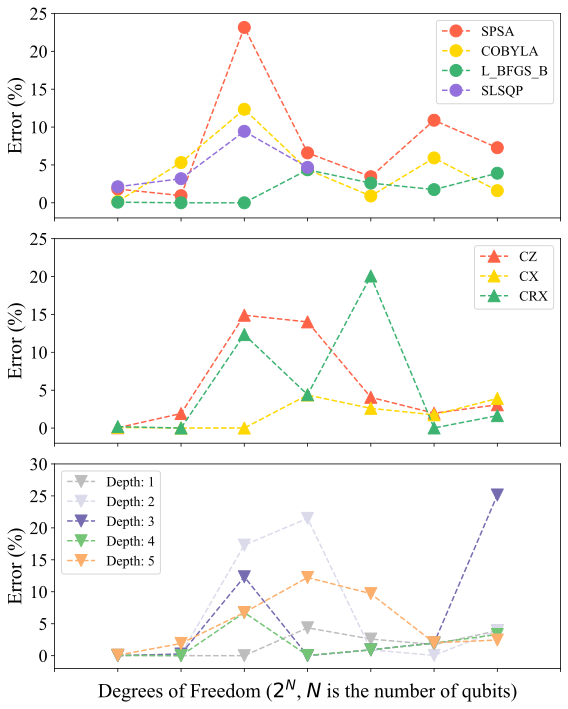

In [ ]:
# Continue Fig 5: Optimizer=L_BFGS_B + Pattern=CX + Depth=1

def subfig_setting():
    pylab.xlim([5, 13])
    pylab.ylim([-0.005, 0.06])
    textsize = 20
    ticks_textsize = 18
    csfont = {'fontname': 'Times New Roman'}
    pylab.ylabel('Error (%)', **csfont, size=textsize)
    ticks_font = fm.FontProperties(
        family='Times New Roman', style='normal', size=ticks_textsize, weight='normal', stretch='normal')
    for label in pylab.gca().get_xticklabels():
        label.set_fontproperties(ticks_font)
    for label in pylab.gca().get_yticklabels():
        label.set_fontproperties(ticks_font)
    pylab.gca().xaxis.set_ticklabels([])

def subfig_setting_end():
    pylab.xlim([5, 13])
    textsize = 20
    ticks_textsize = 18
    csfont = {'fontname': 'Times New Roman'}
    pylab.xlabel(
        'Degrees of Freedom ($2^N$, $N$ is the number of qubits)', **csfont, size=textsize)
    pylab.ylabel('Error (%)', **csfont, size=textsize)
    ticks_font = fm.FontProperties(
        family='Times New Roman', style='normal', size=ticks_textsize, weight='normal', stretch='normal')
    for label in pylab.gca().get_xticklabels():
        label.set_fontproperties(ticks_font)
    for label in pylab.gca().get_yticklabels():
        label.set_fontproperties(ticks_font)

##############################################################################################################
textsize = 20
legend_textsize = 16
csfont = {'fontname': 'Times New Roman'}
props = {'size': legend_textsize-2, 'family': 'Times New Roman',
         'weight': 'normal', 'style': 'normal'}
ticks_textsize = 18
ticks_font = fm.FontProperties(
    family='Times New Roman', style='normal', size=ticks_textsize, weight='normal', stretch='normal')
markersize = 12
markeredgewidth = 4
colors_map = matplotlib.colormaps['tab20c'].colors
colors = ['tomato', 'gold', 'mediumseagreen', 'mediumpurple']

fig = plt.figure(figsize=(8, 10))  # Adjust the overall figure size
gs = gridspec.GridSpec(3, 1)  # 3 rows, 1 column

# Use This for qubits[0:13]:
# fig 5-1
ax1 = fig.add_subplot(gs[0, 0])

for t in range(len(Optimizers)):
    if t != 2:
        index = np.arange(t, len(yerr1), len(Optimizers))
        yerr1_array = yerr1[index]
        # plt.plot(qubits, yerr1_array, marker='o', color=colors[t], markersize=markersize, linestyle='dashed')
        if t == 0:
            plt.plot(qubits, yerr1_array, marker='o', color=colors[0], markersize=markersize, linestyle='dashed')
        if t == 1:
            plt.plot(qubits, yerr1_array, marker='o', color=colors[1], markersize=markersize, linestyle='dashed')
        if t == 3:
            plt.plot(qubits, yerr1_array, marker='o', color=colors[2], markersize=markersize, linestyle='dashed')
t = 2
index = np.arange(t, len(yerr1), len(Optimizers))
yerr1_array = yerr1[index]
qubits_t = qubits[:4]
yerr1_array_t = yerr1_array[:4]
plt.plot(qubits_t, yerr1_array_t, marker='o', color='mediumpurple', markersize=markersize, linestyle='dashed')

subfig_setting()
pylab.legend([f'{Optimizers[0]}', f'{Optimizers[1]}',
              f'{Optimizers[3]}', f'{Optimizers[2]}'], loc='best', prop=props)
pylab.ylim([-2, 25])


# fig 5-2
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)  # sharex to align the x-axes

for t in range(len(Patterns)):
    index = np.arange(t, len(yerr2), len(Patterns))
    yerr2_array = yerr2[index]
    plt.plot(qubits, yerr2_array, marker='^',
             color=colors[t], markersize=markersize, linestyle='dashed')

subfig_setting()
pylab.legend([f'{Patterns[0]}', f'{Patterns[1]}',
             f'{Patterns[2]}'], loc='best', prop=props)
pylab.ylim([-2, 25])


# fig 5-3
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)  # sharex to align the x-axes

for t in range(len(Depths)):
    index = np.arange(t, len(yerr3), len(Depths))
    yerr3_array = yerr3[index]
    plt.plot(qubits, yerr3_array, marker='v',
             color=colors_map[20-(3*t+2)], markersize=markersize, linestyle='dashed')

csfont = {'fontname': 'Times New Roman'}
pylab.xlabel('Qubits Number (N)', **csfont, size=textsize)
subfig_setting_end()
pylab.legend([f'Depth: {Depths[0]}', f'Depth: {Depths[1]}', f'Depth: {Depths[2]}',
              f'Depth: {Depths[3]}', f'Depth: {Depths[4]}'],
             loc='best', prop=props)
pylab.ylim([-2, 30])

plt.tight_layout()
pylab.show()

# fig_name = fig.get_label() + f'fig5_{Case}'
# save_name = fig_name
# path_save_fig = r'C:\\temp\\
#     str(save_name) + '.jpg'
# fig.savefig(path_save_fig, dpi=1200)
